# Data Visualization and Analyses in Python

# Dataset #1

Channel News Asia reported that Singapore experienced its second coolest June in 2020 and the wettest in over a decade. In the same month, the National Environment Agency (NEA) published an article with the headline ‘Number Of Weekly Dengue Cases Expected To Exceed The Historical High Of 891 Unless Urgent Collective Community Action Is Taken’. Hence, I intend to find the relationship between the amount of rainfall and the number of dengue cases in Singapore.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("rainfall-monthly-total.csv")
df.head()

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


This dataset shows monthly measured rain with a rain gauge in Singapore over the years since 1982 till end of 2020 

Dataset URL: https://data.gov.sg/dataset/rainfall-monthly-total

Text(0.5, 1.0, 'Total Ranifall since 1982 - 2020')

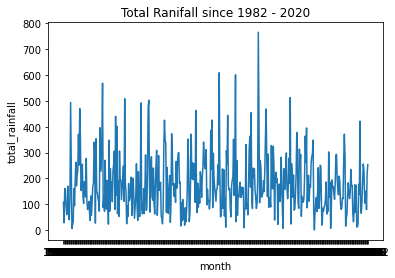

In [ ]:
sns.lineplot(data=df, x="month", y="total_rainfall")
plt.title("Total Ranifall since 1982 - 2020")

The graph above shows the trend in the total amount of rainfall measured in mm (with a rain gauge) over the years since 1982 up until 2020.The dataset was sampled and grouped by each month. By looking at the graph, we can see that the highest amount of rainfall discovered was between 700-800 mm of rain. The trend shown is neither constantly increasing nor constantly decreasing hence it has a random distribution.

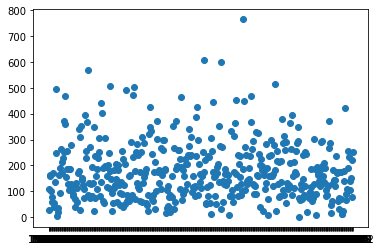

In [ ]:
month = df["month"]
total_rainfall = df["total_rainfall"]

plt.scatter(month, total_rainfall)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

weekly_diseases_df = pd.read_csv("weekly-infectious-disease-bulletin-cases.csv")
weekly_diseases_df.head(20)

,epi_week,disease,no._of_cases
0,2012-W01,Acute Viral hepatitis B,0
1,2012-W01,Acute Viral hepatitis C,0
2,2012-W01,Avian Influenza,0
3,2012-W01,Campylobacterenterosis,6
4,2012-W01,Chikungunya Fever,0
5,2012-W01,Cholera,0
6,2012-W01,Dengue Fever,74
7,2012-W01,Dengue Haemorrhagic Fever,0
8,2012-W01,Diphtheria,0
9,2012-W01,Encephalitis,0


I wanted to show the trend from 2019 to 2020. To plot the graph, I created a table and used a function to store all dengue cases per week.

In [ ]:
years = []
num_of_cases = []

def delete(x):
    if '2019' in x:
        years.append(x)
        return x
    elif '2020' in x:
        years.append(x)
        return x
    else: 
        x = 0
        
weekly_dengue_df = weekly_diseases_df[weekly_diseases_df['disease'] == 'Dengue Fever']
weekly_dengue_df = weekly_dengue_df.reset_index()
weekly_dengue_df = weekly_dengue_df.sort_values(by = 'epi_week', ascending = True)

weekly_dengue_df_use = weekly_dengue_df.copy()
weekly_dengue_df_use19 = weekly_dengue_df.copy()
weekly_dengue_df_use20 = weekly_dengue_df.copy()
weekly_dengue_df_use
        
weekly_dengue_df_use['epi_week'] = weekly_dengue_df_use['epi_week'].apply(delete)
weekly_dengue_df_use = weekly_dengue_df_use.dropna()
weekly_dengue_df_use = weekly_dengue_df_use.reset_index()

for case in weekly_dengue_df_use['no._of_cases']:
    num_of_cases.append(case)

weekly_dengue_df_use.head()

,level_0,index,epi_week,disease,no._of_cases
0,365,12084,2019-W01,Dengue Fever,205
1,366,12122,2019-W02,Dengue Fever,245
2,367,12160,2019-W03,Dengue Fever,207
3,368,12198,2019-W04,Dengue Fever,221
4,369,12236,2019-W05,Dengue Fever,179


Text(0, 0.5, 'Number of Cases')

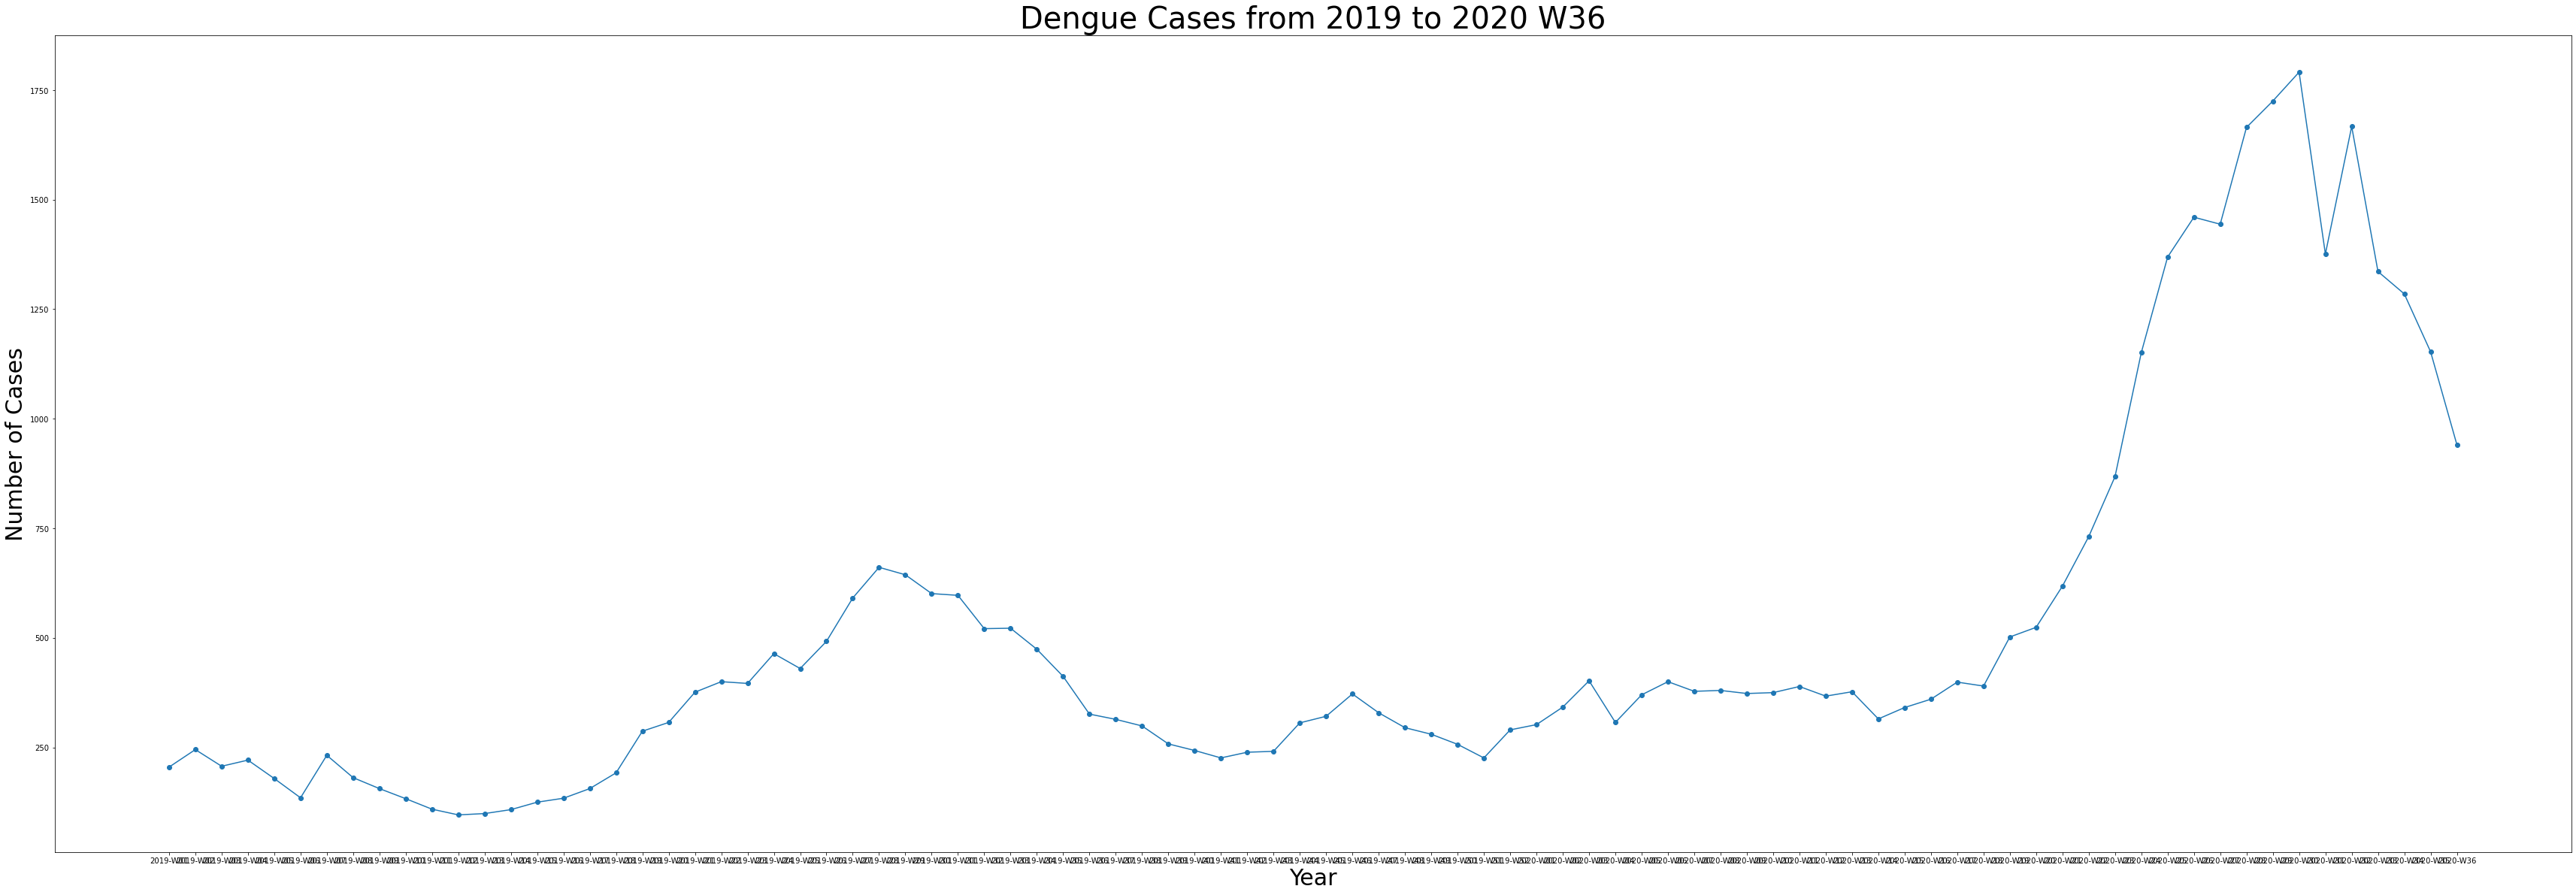

In [ ]:
plt.figure(figsize = (60,20))
plt.plot(years, num_of_cases, marker = 'o', linestyle = 'solid')
plt.title('Dengue Cases from 2019 to 2020 W36', fontsize = 40)
plt.xlabel('Year', fontsize = 30)
plt.ylabel('Number of Cases', fontsize = 30)

Conclusion: From the graph, over the recent years, we can see that there has been a drastic increase in the number of dengue fever cases. The relation between the number of dengue fever cases is directly correlated to the increase in rainfall in Singapore. We come to this conclusion by looking at the data trend over the years from 2019 to 2020.

# Dataset #2

I wanted to find out the annual domestic exports of Asia in 2014 and how they compare to exports in other continents. So I pulled up the dataset of annual domestic exports by area of all the continets from 1980 to 2014 and visualized the data using a pie chart

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("domestic-exports-by-area-annual.csv")

df.head()


,year,area,domestic_exports
0,1980,America,4497
1,1980,Asia,13692.4
2,1980,Europe,3901.6
3,1980,Oceania,2831
4,1980,Africa,884


Dataset URl: https://data.gov.sg/dataset/domestic-exports-by-area?view_id=98954d67-971b-4528-a450-11de26f3695e&resource_id=f5542e9d-58d5-48dc-b8c6-4ba692318b41

This dataframe contains all the domestic exports of the world grouped by continents from 1980 to 2014.

In [ ]:
df.describe()

,year
count,10230.000000
mean,2002.129032
std,10.856604
min,1970.000000
25%,1995.000000
50%,2003.000000
75%,2011.000000
max,2018.000000


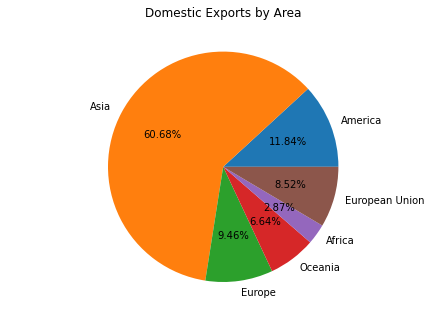

In [ ]:
exports_2014 = df.query("year == '2014'")

areas = exports_2014["area"]
exports = exports_2014["domestic_exports"]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(exports, labels = areas,autopct='%1.2f%%')
plt.title("Domestic Exports by Area")
plt.show()

Analysis: We have chosen pie chart to display the trend of this dataset as it is the most appropriate choice. We can conclude that Asia has the highest amount of domestic exports, with 60.68 percent of the world's exports, when compared to other continents and this was expected since Asia is the biggest continent by land mass than any other continent hence it constitutes a lot more countries.

# Dataset #3

Curiosity leads to many things. For our final exploratory analysis, I wanted to find out whcih ethnic group and gender has dominated the population count over the years and if the government actually recognizes population count as an economic indicator of some sort. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

df = pd.read_csv("singapore-citizens-by-age-group-ethnic-group-and-sex-end-june-annual.csv")

df.head(20)

,year,level_1,level_2,value
0,1970,Total Citizen,0 - 4 Years,226454
1,1970,Total Citizen,5 - 9 Years,267122
2,1970,Total Citizen,10 - 14 Years,273014
3,1970,Total Citizen,15 - 19 Years,227001
4,1970,Total Citizen,20 - 24 Years,175775
5,1970,Total Citizen,25 - 29 Years,102974
6,1970,Total Citizen,30 - 34 Years,112188
7,1970,Total Citizen,35 - 39 Years,99402
8,1970,Total Citizen,40 - 44 Years,89503
9,1970,Total Citizen,45 - 49 Years,72546


This dataset shows the population count categorized by ethnic group, gender and age groups.

Dataset URL: https://data.gov.sg/dataset/singapore-citizens-by-age-group-ethnic-group-and-sex-end-june-annual

In [ ]:
df.describe()

,year
count,10230.000000
mean,2002.129032
std,10.856604
min,1970.000000
25%,1995.000000
50%,2003.000000
75%,2011.000000
max,2018.000000


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


<IPython.core.display.Javascript object>


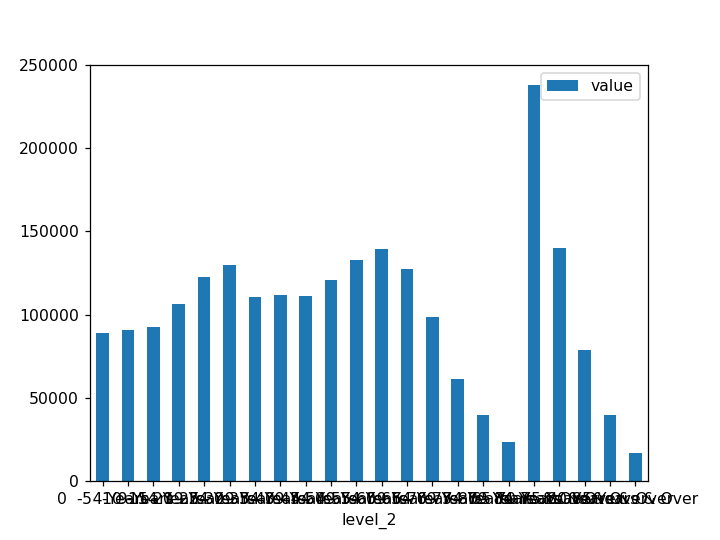

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("singapore-citizens-by-age-group-ethnic-group-and-sex-end-june-annual.csv")

stats_2018 = df.query("(year == '2018') & (level_1 == 'Total Male Citizens')")

gender_group = stats_2018["level_1"].drop_duplicates()
Population = stats_2018["value"]

stats_2018["value"] = stats_2018["value"].apply(pd.to_numeric)

ax = stats_2018.plot.bar(x='level_2', y='value', rot=0)

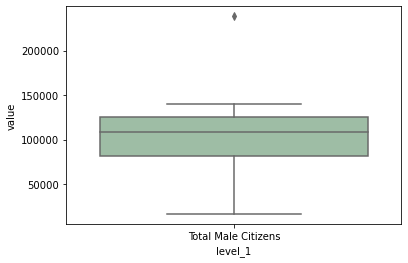

In [ ]:
ax = sns.boxplot(x='level_1', y='value', data=stats_2018, color='#99c2a2')

df variable stores the population of Singapore residents categorized by age, ethnic group and gender. stat_2018 selects only the stats from 2018 of male and female Singaporean citizens and their population. This data is visualized in two ways - with a bar chart and a box-plot diagram. The box plot diagram gives us the statistical indicators such as mean, median and mode. The bar chart shows the trend of our data set over the age groups of the male citizens in Singapore. Level_2 attribute is the age ranges and the level_1 attribute constitutes the ethnic and gender categories of the Singaporean population. Value stores the population count.